Solving One Dimensional Schrodinger Equation:

Name: SALINA BINTI ABDULLAH
Matric Number: 22003159

For this question, we will use numerical techniques for determining the eigenvalues of the one-dimensional Schrodinger equation, specifically for a particle confined within a potential well. The approach involves reformulating the Schrodinger equation as a boundary value problem, enabling us to apply numerical methods to solve it effectively. This process requires approximating the wavefunction of the system, which is crucial for accurately obtaining the eigenvalues that represent the allowed energy levels of the particle. 



# Solving for the Eigenvalues of the 1D Schrödinger Equation

The 1D Schrödinger equation for a particle in a potential well is given by:

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)

$$

In this assignment, we aim to solve this equation numerically using Python.


This Python code explores the process of solving the 1D Schrodinger equation by integrating several key computational techniques. It begins with defining the potential function that governs the particle's behavior, followed by implementing the Numerov method for precise numerical integration. Using the shooting method combined with root-finding algorithms, the code iteratively adjusts energy values to ensure the wavefunction satisfies the boundary conditions at the turning points. This systematic approach not only computes the eigenvalues and eigenfunctions but also provides a way to visualize the quantized wavefunctions.

The Schrodinger equation can be written in this form which is 
$$
\psi"(x)+\frac{2m}{\hbar^2}[E-V(x)]\psi(x)=0
$$

As given in the question, we will be using Sturm-Lioville problem to solve which is:

$$
\frac{d}{dx}(p(x)\frac{du(x)}{dx})+q(x)u(x)=r(x)
$$

Next, we will identify the parameters in our question where to solve the 1D Time-Independent Schrodinger Equation(TISE):

 $\hbar$ is the reduced Planck constant.

 $m$ is the mass of the particle

 $\psi(x)$ is the wavefunction

 $E$ is the energy level

 $V(x)$ is the potential
 

The Sturm-Liouville problem plays a crucial role in physics, as it encompasses a broad range of boundary-value problems, including the eigenvalue problems commonly found in quantum mechanics.Its solutions, such as the wavefunctions for the Schrodinger equation, are required to meet specific boundary conditions. These condition often involve ensuring continuity in both the values and derivatives of the solutions at particular points, reflecting the physical constraints of the system.

So, the Numerov's method is designed to solve second-order differential equations, and well-suited for problems where high precision is required as it achieves fourth order accuracy where 

$$
p(x)=1 
$$


$$
q(x)=\frac{2m}{\hbar^2}[E-V(x)]
$$


$$
r(x)=0
$$


This makes it an ideal choice for equations like the 1D Time-Independent Schrodinger Equation.

**Importing the Libraries**

We wil start our coding with NumPy library by using arrays. We will also use Matplotlib.Pyplot to plot our graph.

In [69]:
import numpy as np
import matplotlib.pyplot as plt

Then, we will list out our parameters on the question to solve this problem.

In [70]:
#Parameters

h_bar=1
m=1
alpha=1
lambda_1=4

Then, we have bound particle in a potential well, the formula given is :

$$
V(x)=\frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)[\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}]
$$

where $\alpha$ and $\lambda$ are given as parameters.

Then, we have eigenvalue equation:

$$
E_n=\frac{\hbar^2}{2m}\alpha^2[\frac{\lambda(\lambda-1)}{2}-(\lambda-1-n)^2]
$$

where n=0,1,2,....

The x-value range where we will plot the potential function, it is shown below.

In [71]:
#Parameters for x-value range:
b_min=-5
b_max=5
h= 0.05
x=np.arange(b_min,b_max+h,h)

The spatial domain is specifying the minimum and maximum values of x which is -20 and 20. This domain represents the region over which the potential function and wavefunction will be computed. A step size of 0.05 acts as spacing between adjacent points in the domain. 

Then, we define our potential function V(x) and the code is shown below:

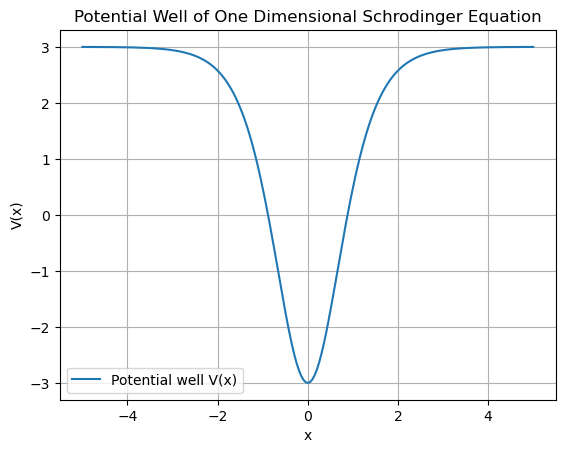

In [72]:
#Potential function
# Define the potential well
def potential_well(x):
    return (h_bar**2 / (2 * m) * (alpha**2 * lambda_1 * (lambda_1 - 1) * (0.5 - 1 / np.cosh(alpha * x)**2)))

V=potential_well(x)

plt.plot(x,V,label="Potential well V(x)")
plt.title("Potential Well of One Dimensional Schrodinger Equation")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.legend()
plt.grid()
plt.show()

Based on what I have explained, we will be using Numerov method. From the Schrodinger equation, we can rewrite it :

The Schrodinger equation can be written in this form which is 
$$
\psi"(x)=-\frac{2m}{\hbar^2}[E-V(x)]\psi(x)
$$

Numerov method by using second derivatives with a relations.
 
$\psi_{i+1} = \frac{2(1-\frac{5}{12}h^{2}k_{i})\psi_{i} - (1+\frac{1}{12}h^{2}k_{i-1})ψ_{i-1}}{1+\frac{1}{12}h^{2}k_{i+1}}$

There are some steps to apply Numerov method. 
First of all, setting initial conditions for the wavefunction, 
$$
\psi(x_0)=0 
$$
and assigning the small non zero value for the adjacent point 
$$
\psi(x_0)=10^-5
$$

Secondly, define the potential function where we need to compute the V(x) across the defined the spatial domain. This potential will directly influence the behavior of the wavefunction.

Third, we need to calculate the necessary coefficients, such as

$$
k(x)=\frac{2m}{\hbar^2}[E-V(x)]
$$

for each grid point. These values are essential for Numerov's recurrence relation.

Next, by applying Numerov formula, we get to iterate the relation to compute the wavefunction across the domain.

Last but not least, by normalize the wavefunction, we can normalize 
$\psi(x)$ such that total probability over the spatial domain satisfies equals to 1.




In [73]:
def shooting(E, x, psi_0, psi_1):
    h = x[1] - x[0]

   # Define the Numerov method
def numerov_method(x, E, V):
    h=x[1]-x[0]
    h2 = h**2  

    # Initialize the wavefunction array with boundary conditions
    psi = np.zeros(len(x))
    psi[0] = 0.0  
    psi[1] = 1e-6  

    # Calculate k(x) for the given energy and potential
    k_values = (2 * m /h_bar**2) * (E - V)

    # Iterate over the spatial grid using Numerov's recurrence relation
    for idx in range(1, len(x) - 1):
        psi[idx + 1] = (
            (2 * (1 - (5 / 12) * h2 * k_values[idx]) * psi[idx])
            - ((1 + (1 / 12) * h2 * k_values[idx - 1]) * psi[idx - 1])
        ) / (1 + (1 / 12) * h2 * k_values[idx + 1])

    return psi


For an eigenvalue problem, the particle is confined within a potential well V(x), where ∣x∣→∞. This confinement ensures that the particle's wavefunction, $\psi(x)$, vanishes at the boundaries of the well. To solve this eigenvalue problem, the Shrodinger equation can be integrated using the Numerov algoritm, either from the left to the right or vice versa across the potential region.

Due to the boundary condition, $\psi(x)$=0 as ∣x∣→∞, the integration naturally spans region where the wavefunction transitions from an exponentially growing regime to an oscillatory region, and then to an exponentially decaying regime. This introduces numerical challenges when integrating over the entire domain.

1. Integration from the left boundary produces a wavefunction,
$$
\psi_{left}(x)
$$.
2.Integration from the right boundary yields a wavefunction,
$$
\psi_{right}(x)
$$.
3. The trial eigenvalue is iteratively adjusted until 
$$
\psi_{left}(x)
$$ 
and
$$
\psi_{right}(x)
$$ 

match at a selected turning point in both value and derivative.



By choosing the turning point, the continuity conditions are:

$$
\psi_l(x_r)=\psi_r(x_r)
$$
$$
\psi'_l(x_r)=\psi'_r(x_r)
$$

By combining both conditions, we obtain

$$
\frac{\psi'_l(x_r)}{\psi_l(x_r)}=\frac{\psi'_r(x_r)}{\psi_r(x_r)}
$$

By using the three point formula for the first order, we have:

$$
f(E)=\frac{[\psi_l(x_r+h)-\psi_r(x_r-h)]-[\psi_r(x_r+h)-\psi_r(x_r-h)]}{2h\psi(x_r)}=0
$$

We can solve this using root search scheme.

In [74]:
def matching_function(E,x,V):
    h=x[1]-x[0]
    psi_l= numerov_method (x,0,1e-6,E,V)
    psi_r= numerov_method (x [::-1], 0, 1e-3, E, V)[::-1]
    midpoint= len(x)//2

#Define both parts of the three point formula
    first_term= (psi_l[midpoint +1]-psi_l[midpoint-1])/ (2 * h * psi_l[midpoint])
    second_term= (psi_r[midpoint + 1] - psi_r[midpoint - 1]) / (2 * h* psi_r[midpoint])
 # The value of the three point formula
    return first_term - second_term

To define the eigenvalues function,

First three computed eigenvalues: [-1.5, 1.0, 2.5]


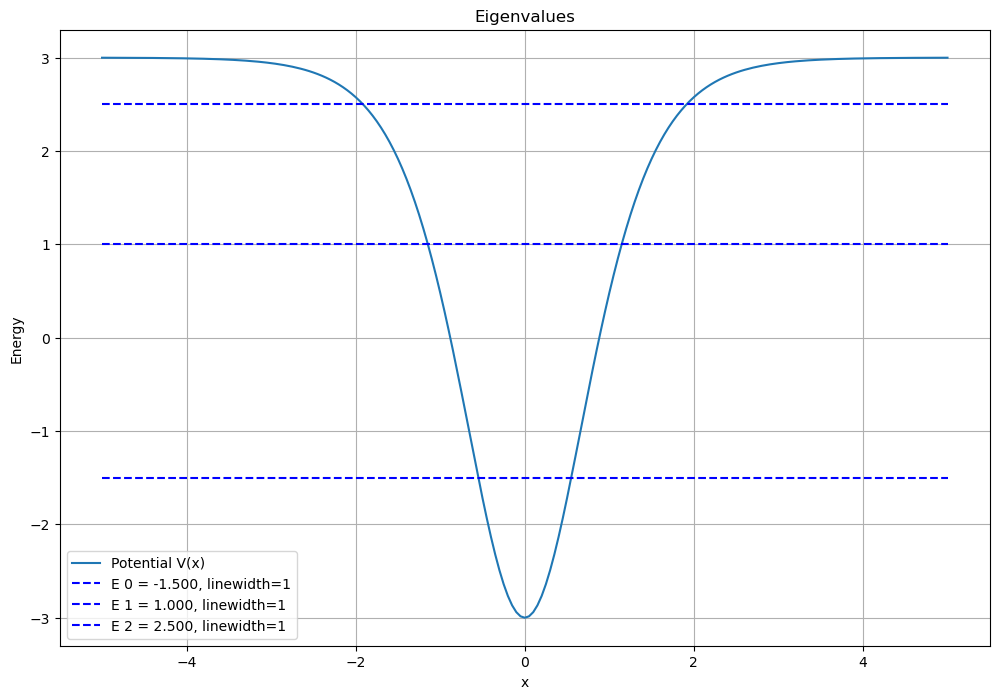

In [75]:
#Define the eigenvalues function:
def E(n):
    return ((h_bar ** 2 / (2 * m)) * (alpha ** 2))*(((lambda_1 * (lambda_1 - 1))/2) - (lambda_1 - 1 - n)**2)

# Find the eigenvalues
def find_eigenvalue(n_max):
    eigenvalues = []
    for n in range (n_max):
         eigenvalues.append(E(n))
    return eigenvalues

# Compute exact eigenvalues
n_max = 3
eigenvalues = find_eigenvalue(n_max)
print("First three computed eigenvalues:", eigenvalues)

# Plot potential and eigenvalues
plt.figure(figsize=(12, 8))
plt.plot(x, V, label="Potential V(x)")
for i, E in enumerate(eigenvalues):
    plt.hlines(E, xmin=b_min, xmax=b_max, colors='b', linestyles='dashed', label=f'E {i} = {E:.3f}, linewidth=1' )

# Configure plot
plt.title("Eigenvalues")
plt.xlabel("x")
plt.ylabel("Energy")
plt.legend()
plt.grid()
plt.show()

Last but not least, we will plot the potential well with eigenfunction and eigenvalue that we have found before.

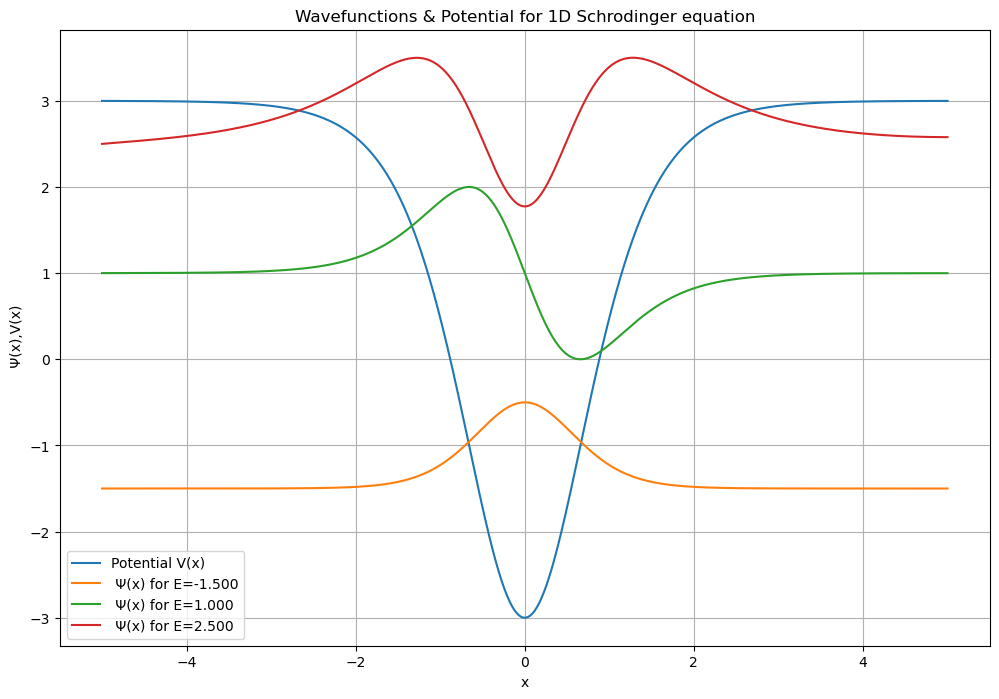

In [76]:
#Spatial grid and potential:
x=np.linspace(-5,5,1000)
V=potential_well(x)

# Plot potential and wavefunctions
plt.figure(figsize=(12, 8))
plt.plot(x, V, label="Potential V(x)")

for i, E in enumerate(eigenvalues[:3]):  
    psi = numerov_method(x, E, V)
    psi_norm= psi / np.max(np.abs(psi))  
    plt.plot(x, psi_norm + E, label=f" Ψ(x) for E={E:.3f}")

plt.title("Wavefunctions & Potential for 1D Schrodinger equation")
plt.xlabel("x")
plt.ylabel(" Ψ(x),V(x)")
plt.legend()
plt.grid()
plt.show()